Dependencies and Imports

In [121]:
import pandas as pd
import numpy as np
import geopandas as gpd
import json
import networkx as nx
import matplotlib.pyplot as plt
from libpysal import weights, examples

In [208]:
ddb = gpd.read_file('./data/ddb_roundabout.geojson')
roads = gpd.read_file('./data/roundaboutv3.geojson')

In [124]:
def check_graph(nxgraph):
    # Check if the graph has any nodes.
    print("Graph nodes:")
    if nxgraph.number_of_nodes() > 0:
        print("The graph has nodes.")
        #count number of nodes
        print("Number of nodes:", nxgraph.number_of_nodes())
    else:
        print("The graph does not have any nodes.")
    # Check if the graph has any edges.
    print("\nGraph edges:")
    if nxgraph.number_of_edges() > 0:
        print("The graph has edges.")
        #count number of edges
        print("Number of edges:", nxgraph.number_of_edges())
    else:
        print("The graph does not have any edges.")
    # Check if the graph is connected.
    print("\nGraph connection:")
    if nx.is_connected(nxgraph):
        print("The graph is connected.")
    else:
        print("The graph is disconnected.")
        

Graph for coordinates of DDB

https://networkx.org/documentation/stable/auto_examples/geospatial/plot_points.html
https://networkx.org/documentation/stable/auto_examples/geospatial/plot_polygons.html
https://networkx.org/documentation/stable/auto_examples/geospatial/plot_delaunay.html

Examples:

https://networkx.org/nx-guides/content/exploratory_notebooks/facebook_notebook.html
https://networkx.org/nx-guides/content/generators/geometric.html

DDB Only

In [254]:
ddb_coordinates = np.column_stack((ddb.geometry.x, ddb.geometry.y))
dist = weights.DistanceBand.from_array(ddb_coordinates, threshold=1000)
incidents = dist.to_networkx()
incident_loc = dict(zip(incidents.nodes, ddb_coordinates))
incidents.remove_edges_from(list(incidents.edges()))

c:\Python311\Lib\site-packages\libpysal\weights\weights.py:224: UserWarning: The weights matrix is not fully connected: 
 There are 76 disconnected components.
 There are 13 islands with ids: 744, 745, 759, 767, 789, 971, 1154, 1391, 1644, 1801, 1850, 1920, 2048.
  warnings.warn(message)


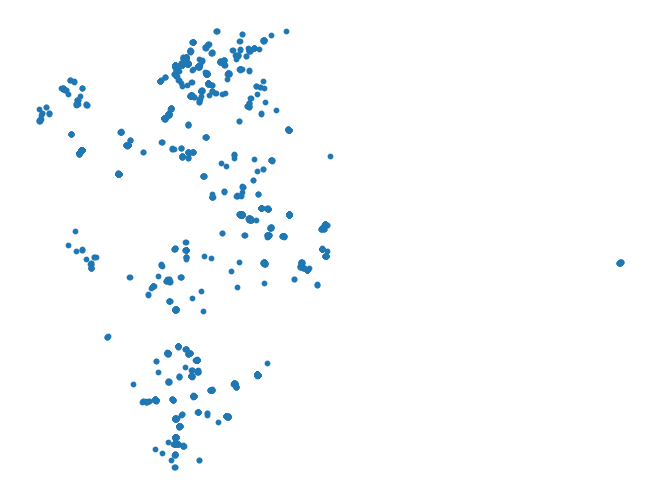

In [255]:
nx.draw(incidents, incident_loc, node_size=10)
plt.show()

In [230]:
check_graph(incidents)

Graph nodes:
The graph has nodes.
Number of nodes: 2167

Graph edges:
The graph does not have any edges.

Graph connection:
The graph is disconnected.


Roundabouts Only

In [251]:
centres = np.column_stack((roads.centroid.x, roads.centroid.y))
queen = weights.Queen.from_dataframe(roads)
roundgraph = queen.to_networkx()
positions = dict(zip(roundgraph.nodes, centres))
roundgraph.remove_edges_from(list(roundgraph.edges()))

C:\Users\User\AppData\Local\Temp\ipykernel_75396\3504636887.py:2: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  queen = weights.Queen.from_dataframe(roads)
c:\Python311\Lib\site-packages\libpysal\weights\weights.py:224: UserWarning: The weights matrix is not fully connected: 
 There are 463 disconnected components.
 There are 355 islands with ids: 0, 1, 2, 3, 9, 14, 16, 21, 22, 24, 25, 30, 31, 32, 33, 34, 49, 50, 51, 54, 55, 56, 57, 58, 61, 62, 65, 67, 68, 69, 71, 72, 76, 80, 81, 82, 83, 84, 86, 87, 88, 89, 90, 94, 95, 100, 101, 102, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 116, 117, 119, 120, 126, 127, 130, 131, 132, 136, 137, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 176, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190,

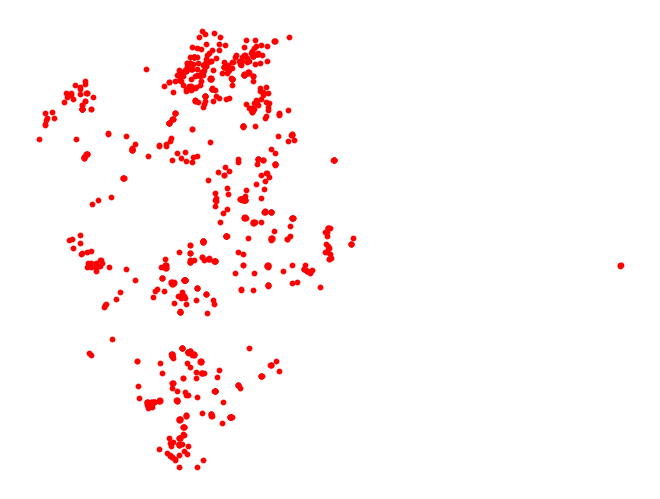

In [252]:
nx.draw(roundgraph, positions, node_size=10, node_color="r")
plt.show()

In [256]:
check_graph(roundgraph)

Graph nodes:
The graph has nodes.
Number of nodes: 904

Graph edges:
The graph does not have any edges.

Graph connection:
The graph is disconnected.


Combined Graph

In [257]:
"""
change colors to represent either ddb or roundabout node /
attach prefixes to columns of each dataset first /
take the nodes directly from the dataset instead /
then connect edges based on euclidean distance or harvesine formula (nearest 100m maybe?)
then send email to professor about results

ask what the next way to connect edges should be?
look to retain more information about nodes when adding nodes to the graph for plot
- to allow for more investigation
"""

'\nchange colors to represent either ddb or roundabout node /\nattach prefixes to columns of each dataset first /\ntake the nodes directly from the dataset instead /\nthen connect edges based on euclidean distance or harvesine formula (nearest 100m maybe?)\nthen send email to professor about results\n\nask what the next way to connect edges should be?\nlook to retain more information about nodes when adding nodes to the graph for plot\n- to allow for more investigation\n'

In [244]:
combined_graph = nx.Graph()

In [247]:
ddb_nodes = ddb.nodes
roundabout_nodes = roads.nodes

combined_graph.add_nodes_from(ddb_nodes)
combined_graph.add_nodes_from(roundabout_nodes)

combined_coordinates = np.concatenate([ddb_coordinates, centres])
combined_pos = dict(zip(combined_graph.nodes, combined_coordinates))

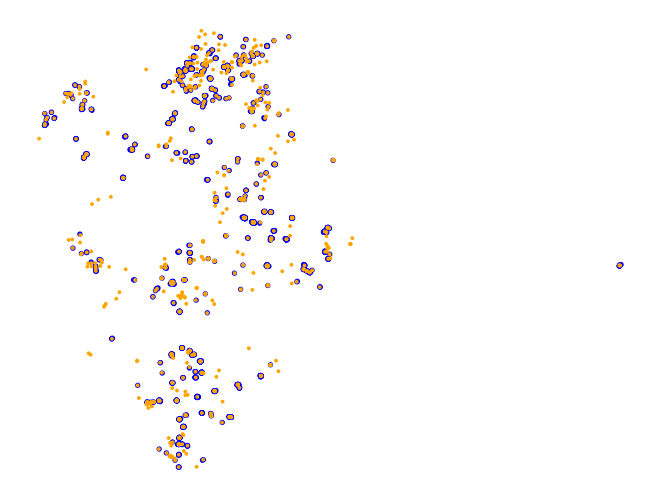

In [249]:
color_map = {
    'ddb': 'blue',
    'r': 'orange',
}
colors = [color_map[node.split('_')[0]] for node in combined_graph.nodes]
sizes = [8 if color == 'blue' else 3 for color in colors]

nx.draw(combined_graph, combined_pos, node_size=sizes, node_color=colors)
plt.show()

Use the roundabout to make one part of the node, the ddb to make another part of the node, and then use the relationship between incident and road to make the edge.

Roads have their own attributes, such as length, width, and number of lanes. Incidents also have certain attributes, such as speed and acceleration.

The relationship between incident and roundabout is distance, nearby arc, and how many kilometers on the road it is.